In [1]:
import os
import re
import csv
import pyfftw

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from math import sqrt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures

## Data prep ##

In [2]:
# #####extracting velocity(ux, uy)#####

# # base_path  "../2D_Decay"

# all_folders = os.listdir(base_path)

# numeric_folders = sorted(
#     [folder for folder in all_folders if folder.replace('.', '').isdigit()],
#     key=lambda x: float(x)
# )

# output_dir = "../processed_data"
# os.makedirs(output_dir, exist_ok=True)

# for folder in numeric_folders:
#     folder_path = os.path.join(base_path, folder)
#     if os.path.isdir(folder_path):
#         u_file_path = os.path.join(folder_path, "U")
#         if os.path.isfile(u_file_path):
#             print(f"Processing file: {u_file_path}")
#             with open(u_file_path, 'r') as file:
#                 lines = file.readlines()
#                 data = []
#                 in_data_section = False

#                 for line in lines:
#                     line = line.strip()
#                     if line.startswith("internalField"):
#                         in_data_section = True
#                         continue
#                     if in_data_section:
#                         if line.startswith(")"):
#                             break
#                         match = re.match(r"\(([-\d.eE+]+) ([-\d.eE+]+) [-\d.eE+]+\)", line)
#                         if match:
#                             ux = float(match.group(1))
#                             uy = float(match.group(2))
#                             data.append((ux, uy))

#                 if data:
#                     csv_file = os.path.join(output_dir, f"{folder}_ux_uy_data.txt")
#                     with open(csv_file, "w", newline="") as csvfile:
#                         writer = csv.writer(csvfile)
#                         writer.writerow(["ux", "uy"])
#                         writer.writerows(data)
#                     print(f"Saved {len(data)} entries for folder {folder} to {csv_file}")
#                 else:
#                     print(f"No vector data found in {u_file_path}.")

# def load_csv_data(folder_name):
#     csv_file = os.path.join(output_dir, f"{folder_name}_ux_uy_data.txt")
#     if os.path.isfile(csv_file):
#         try:
#             data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
#             if data.ndim == 1:
#                 data = data.reshape(-1, 2)
#             return data
#         except ValueError:
#             print(f"No valid data in file: {csv_file}")
#             return None
#     else:
#         print(f"No data file found for folder: {folder_name}")
#         return None

# folder_to_process = "0.2"
# data = load_csv_data(folder_to_process)
# if data is not None and len(data) > 0:
#     print(f"Loaded {len(data)} entries from folder {folder_to_process}")
#     avg_ux = np.mean(data[:, 0])
#     avg_uy = np.mean(data[:, 1])
#     print(f"Average ux: {avg_ux:.6f}, uy: {avg_uy:.6f}")
# else:
#     print(f"No data available for folder {folder_to_process}.")


In [3]:
# #####extracting vorticity######

# base_path = "../2D_Decay"
# all_folders = os.listdir(base_path)

# numeric_folders = sorted(
#     [folder for folder in all_folders if folder.replace('.', '').isdigit()],
#     key=lambda x: float(x)
# )

# output_dir = "../proceed_data_vor/proceed_data_v_given/processed_data_vor"
# os.makedirs(output_dir, exist_ok=True)

# for folder in numeric_folders:
#     folder_path = os.path.join(base_path, folder)
#     if os.path.isdir(folder_path):
#         u_file_path = os.path.join(folder_path, "vorticity")
#         if os.path.isfile(u_file_path):
#             with open(u_file_path, 'r') as file:
#                 lines = file.readlines()
#                 vorticity_data = []
#                 in_data_section = False

#                 for line in lines:
#                     line = line.strip()
#                     if line.startswith("internalField"):
#                         in_data_section = True
#                         continue
#                     if in_data_section:
#                         if line.startswith(")"):
#                             break
#                         match = re.match(r"\([\d\-eE.+]+ [\d\-eE.+]+ ([\d\-eE.+]+)\)", line)
#                         if match:
#                             vorticity = float(match.group(1))  # 3번째 열 추출(z축만 추출)
#                             vorticity_data.append(vorticity)

#                 csv_file = os.path.join(output_dir, f"{folder}_vor_data.txt")
#                 with open(csv_file, "w", newline="") as csvfile:
#                     writer = csv.writer(csvfile)
#                     writer.writerow(["vorticity"])
#                     writer.writerows([[value] for value in vorticity_data])
#                 print(f"Saved {len(vorticity_data)} entries for folder {folder} to {csv_file}")

# def load_csv_data(folder_name):
#     csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.txt")
#     if os.path.isfile(csv_file):
#         data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
#         return data
#     else:
#         print(f"No data file found for folder: {folder_name}")
#         return None

# folder_to_process = "0.2"
# vor_data = load_csv_data(folder_to_process)
# if vor_data is not None:
#     print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
#     print(f"Average vorticity: {np.mean(vor_data):.6f}")


## declare file path ##

In [4]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

files3 = [
    '../proceed_data/proceed_data_v_half/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/150_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/170_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/186_ux_uy_data.txt',
]

files3_vor = [
    '../proceed_data/proceed_data_v_half/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/150_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/170_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/186_vor_data.txt',
]


## separating ux, uy ##

In [5]:
def sep(data):
    df = pd.read_csv(data)
    ux = df['ux'].values
    uy = df['uy'].values
    
    return ux, uy
    
def resizing(ux, uy):
    N = 1024
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    return ux_2d, uy_2d

## Function of Loading vorticity and E_K Plotting ##

In [28]:
def get_ek(file):
    ux, uy = sep(file)
    ux,uy = resizing(ux, uy)
    k, e_k = ek(ux, uy, 1024)
    return k, e_k

def get_vorticity(file):
    
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[0:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    
    return data, label

def velocity_plotting(file):
    
    ux, uy = sep(file)
    label = file.split('/')[-1].split('_')[0]
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    k_array, Ek_array = ek(ux_2d, uy_2d, 1024)
    Ek_array[0] = 10e-21
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k_array, Ek_array, label=f"{label}s")    

def compared_line():
    k_a = np.logspace(0, 1, 500)
    E_k_a = ((k_a)**-(5/3)) * 10e-1
    plt.loglog(k_a, E_k_a, linestyle='--', color='red', label="E(k) = k^-5/3")
    k_a_shift = k_a * 10
    E_k_a_2 = ((k_a)**-4) * 10e-3
    plt.loglog(k_a_shift, E_k_a_2, linestyle='--', color='black', label="E(k) = k^-4")

## Energy Spectrum Function ##

In [32]:
def ek(u, v, n_bins):
    Ny, Nx = 1024,1024
    Lx = 6.283
    Ly = 6.283
    
    dx = Lx / Nx
    dy = Ly / Ny
    area_element = dx * dy  # Physical space area element

    # Remove mean to handle periodic boundary conditions correctly
    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)

    # Compute 2D FFT
    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)

    # Calculate energy spectral density (0.5 factor for kinetic energy, area_element for physical space integration)
    PS = 0.5 * (np.abs(U_hat)**2 + np.abs(V_hat)**2) * area_element / (Nx * Ny)**2

    # Angular wavenumbers (radians per unit length)
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)
    
    KX, KY = np.meshgrid(kx, ky)
    K_mag = np.sqrt(KX**2 + KY**2)
    
    # Create bins (consider logarithmic bins for turbulence spectra)
    k_max = K_mag.max()
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        dk_bin = k_max_ - k_min
        
        # Handle division by zero for first bin (k=0 case)
        if dk_bin < 1e-10:
            E_k[i] = 0.0
            k_vals[i] = 0.0
            continue
            
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        shell_sum = np.sum(PS[mask])
        
        # Energy spectrum density (energy per unit wavenumber)
        E_k[i] = shell_sum / dk_bin  # Divide by bin width
        k_vals[i] = 0.5*(k_min + k_max_)

    return k_vals, E_k

In [34]:
def ek(u, v, n_bins):

    Ny, Nx = u.shape
    Lx = 6.283
    Ly = 6.283
    
    dx = Lx / Nx
    dy = Ly / Ny

    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)

    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)

    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2) / (Nx * Ny)**2
    
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)
    
    KX, KY = np.meshgrid(kx, ky)
    
    K_mag = np.sqrt(KX**2 + KY**2)
    
    k_max = K_mag.max()
    
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        shell_sum = np.sum(PS[mask])
        
        k_mid = 0.5*(k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid

    return k_vals, E_k

In [9]:
# compute the energy spectrum numerically using vorticity
def ensp(nx,ny,w):
    
    '''
    Computation of energy spectrum and maximum wavenumber from vorticity field
    
    Inputs
    ------
    nx,ny : number of grid points in x and y direction
    w : vorticity field in physical spce (including periodic boundaries)
    
    Output
    ------
    en : energy spectrum computed from vorticity field
    n : maximum wavenumber
    '''
    w = data.reshape(1024, 1024)
    dx = 6.283/1024
    
    epsilon = 1.0e-6

    kx = np.empty(nx)
    ky = np.empty(ny)
    
    kx[0:int(nx/2)] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(0,int(nx/2)))
    kx[int(nx/2):nx] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(-int(nx/2),0))

    ky[0:ny] = kx[0:ny]
    
    kx[0] = epsilon
    ky[0] = epsilon

    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    
    a = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')
    b = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')

    fft_object = pyfftw.FFTW(a, b, axes = (0,1), direction = 'FFTW_FORWARD')
    wf = fft_object(w[0:nx,0:ny]) 
    
    es =  np.empty((nx,ny))
    
    kk = np.sqrt(kx[:,:]**2 + ky[:,:]**2)
    es[:,:] = np.pi*((np.abs(wf[:,:])/(nx*ny))**2)/kk
    
    n = int(np.sqrt(nx*nx + ny*ny)/2.0)-1
    
    en = np.zeros(n+1)
    
    for k in range(1,n+1):
        en[k] = 0.0
        ic = 0
        ii,jj = np.where((kk[1:,1:]>(k-0.5)) & (kk[1:,1:]<(k+0.5)))
        ic = ii.size
        ii = ii+1
        jj = jj+1
        en[k] = np.sum(es[ii,jj])
        
        en[k] = en[k]/ic
        
    return en, n

## Cal. Dissp. rate ##

In [13]:
def dissp_rate(ux, nu):
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    nu = nu  # given:0.00001
    
    ux = ux.reshape((grid_size, grid_size))
    ux_prime = ux - np.mean(ux)
    
    duxdx = (np.roll(ux_prime, -1, axis=1) - np.roll(ux_prime, 1, axis=1)) / (2 * dx)
    duxdy = (np.roll(ux_prime, -1, axis=0) - np.roll(ux_prime, 1, axis=0)) / (2 * dx)
    
    epsilon = 0.5 * nu * np.mean(duxdx**2 + duxdy**2)
    print(f"ε: {epsilon:.6e} m²/s³")
    return epsilon

ε: 7.671993e-05 m²/s³
ε: 2.827554e-05 m²/s³
ε: 1.254915e-05 m²/s³
ε: 9.027902e-06 m²/s³
ε: 7.649634e-06 m²/s³
ε: 5.781600e-06 m²/s³
ε: 5.885801e-06 m²/s³
ε: 5.516056e-06 m²/s³
ε: 5.050336e-06 m²/s³
ε: 3.902053e-06 m²/s³
ε: 3.301975e-06 m²/s³
ε: 3.204711e-06 m²/s³
ε: 2.550474e-06 m²/s³
ε: 2.161404e-06 m²/s³


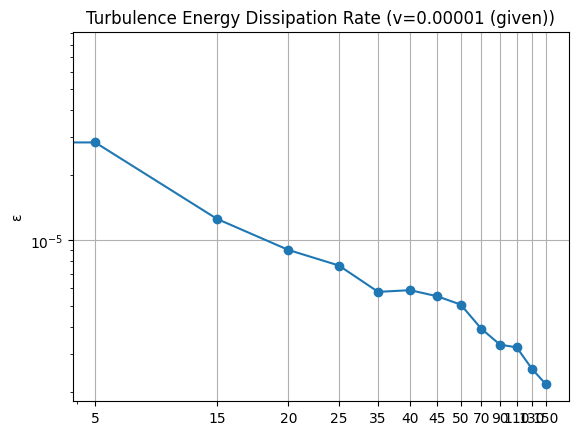

In [14]:
eps1 = np.array([])
time_for_eps = np.array([])
for file in files:
    ux, uy = sep(file)
    epsilon = dissp_rate(ux, 0.00001)
    eps1 = np.append(eps1, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps = np.append(time_for_eps, label)
plt.loglog(time_for_eps, eps1, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()

ε: 3.835997e-05 m²/s³
ε: 1.490715e-05 m²/s³
ε: 6.861555e-06 m²/s³
ε: 5.571942e-06 m²/s³
ε: 4.089786e-06 m²/s³
ε: 3.207011e-06 m²/s³
ε: 2.682493e-06 m²/s³
ε: 2.656224e-06 m²/s³
ε: 2.644201e-06 m²/s³
ε: 2.267040e-06 m²/s³
ε: 1.738368e-06 m²/s³
ε: 1.489265e-06 m²/s³
ε: 1.452274e-06 m²/s³
ε: 1.286277e-06 m²/s³


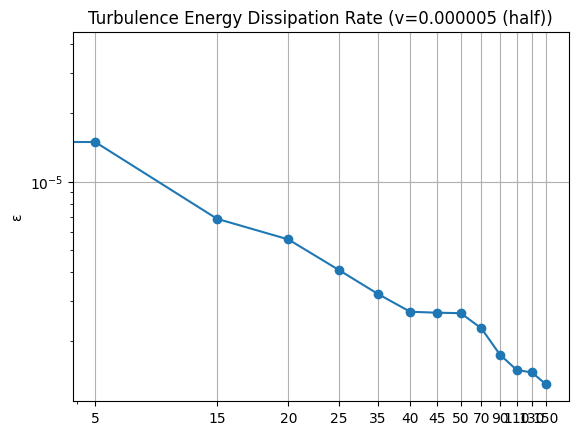

In [15]:
eps3 = np.array([])
time_for_eps3 = np.array([])
for file in files3:
    ux, uy = sep(file)
    epsilon = dissp_rate(ux, 0.000005)
    eps3 = np.append(eps3, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps3 = np.append(time_for_eps3, label)
plt.loglog(time_for_eps3, eps3, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.000005 (half))")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'eps: v(given) - v(10 times)')

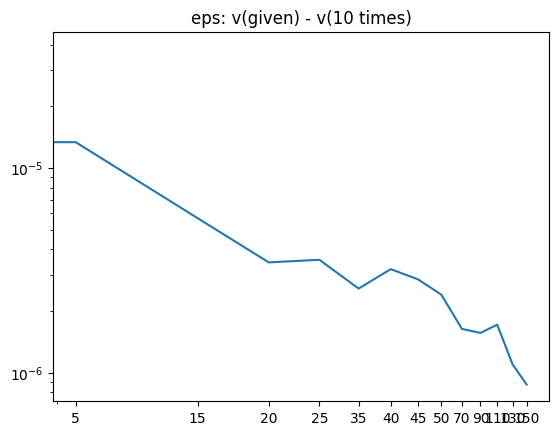

In [16]:
eps = eps1[0:14]-eps3[0:14]
plt.loglog(time_for_eps, eps)
plt.title("eps: v(given) - v(10 times)")

## enstrophy_diss ##

In [17]:
def enstrophy_diss(omega, nu):
    dx = 6.283 / 1024
    size = 1024
    omega = omega.reshape((size, size))
    # ∇ω
    domega_dx = (np.roll(omega, -1, axis=1) - np.roll(omega, 1, axis=1)) / (2 * dx)
    domega_dy = (np.roll(omega, -1, axis=0) - np.roll(omega, 1, axis=0)) / (2 * dx)
    
    # |∇ω|²
    grad_omega_squared = domega_dx**2 + domega_dy**2

    zeta = nu * np.mean(grad_omega_squared)
    
    return zeta
    
def kd_2d(zeta, nu):
    kd = (zeta/(nu)**3)**(1/6)
    return kd

[0.03536677 0.43587494 0.13863329 0.08406253 0.05752166 0.03016003
 0.02342687 0.01766725 0.01374619 0.00993917 0.00692099 0.00416027
 0.00302757 0.00203318 0.00254334 0.00172254]


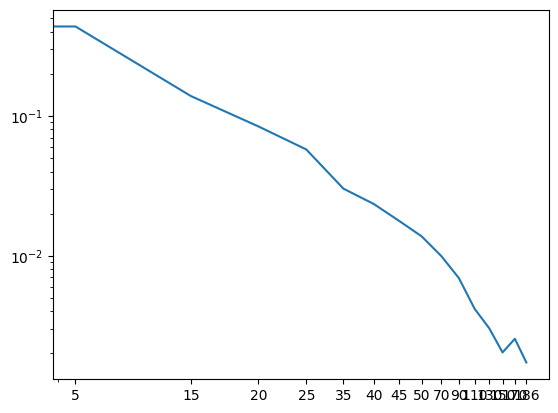

In [18]:
DataNum = len(files_vor)

zeta1 = np.array([])
label1 = np.array([])

for file in files3_vor:
    data, label = get_vorticity(file)
    nu = 0.00001 #given
    # nu = 0.0001 #10 times
    zeta_value = enstrophy_diss(data, nu)
    zeta1 = np.append(zeta1, zeta_value)
    label1 = np.append(label1, label)
    
print(zeta1)
plt.loglog(label1, zeta1)

In [19]:
kd1 = kd_2d(zeta1, 0.00001)
kd1

array([181.1754039 , 275.35543348, 227.49817787, 209.29896077,
       196.47406839, 176.42981177, 169.15533676, 161.38437228,
       154.77366594, 146.63074898, 138.04733414, 126.81975321,
       120.27694425, 112.55445674, 116.8335327 , 109.48679789])

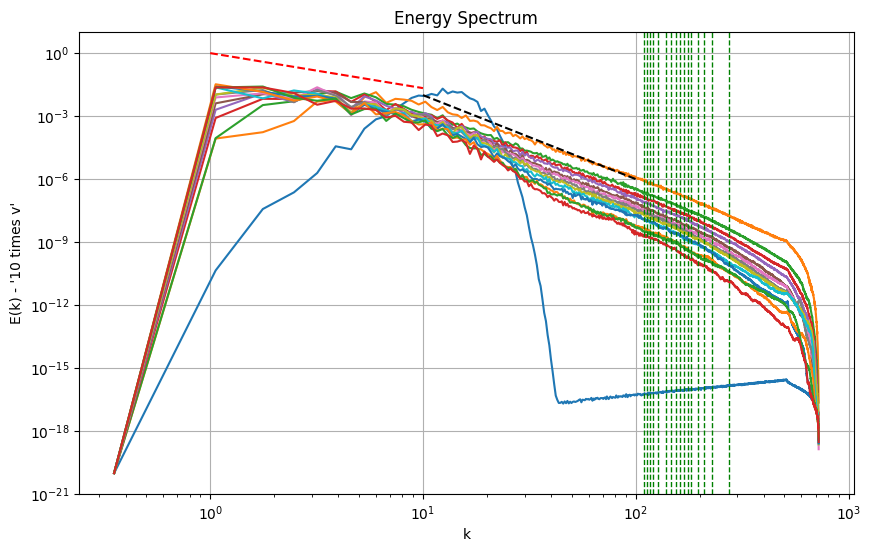

In [20]:
plt.figure(figsize=(10, 6))
N=1024
for file in files:
    velocity_plotting(file)
    k, e_k = get_ek(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
compared_line()
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
#plt.legend()
plt.grid(True)
plt.show()

## compute palinstrophy ##

Calculated Palinstrophy: 680330.847033


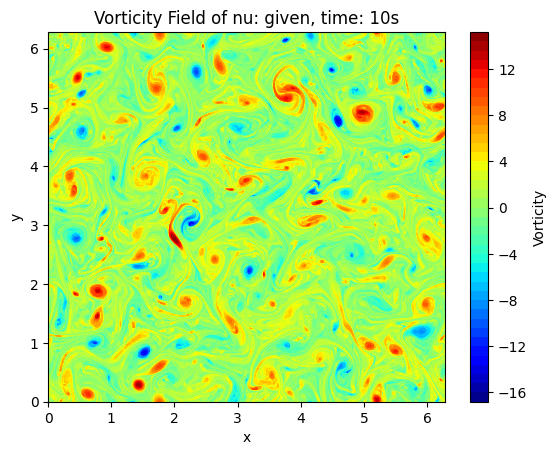

Calculated Palinstrophy: 1065266.708478


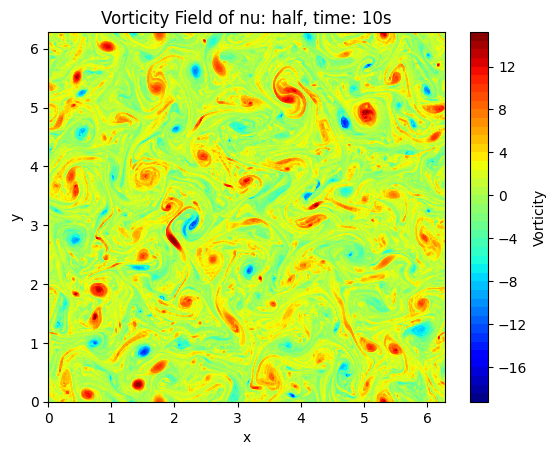

Calculated Palinstrophy: 1979.139893


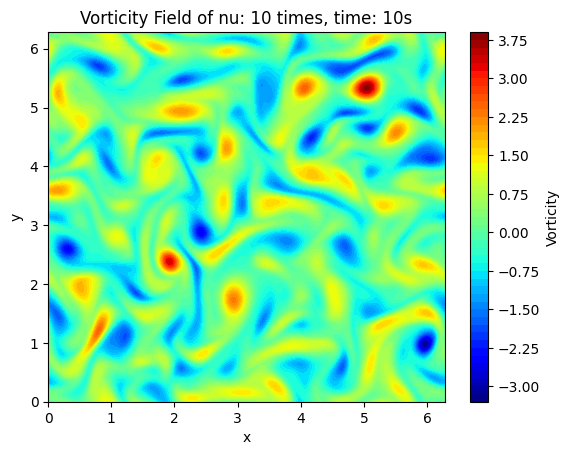

In [77]:
# def compute_vorticity(u, v, dx, dy):
#     dudy, dudx = np.gradient(u, dy, dx)
#     dvdy, dvdx = np.gradient(v, dy, dx)
#     vorticity = dvdx - dudy
#     return vorticity

test_files = {
    '../proceed_data/proceed_data_v_given/processed_data_vor/10_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/10_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/10_vor_data.txt'
    
}

def compute_palinstrophy(vorticity, dx, dy):
    dwdy, dwdx = np.gradient(vorticity, dy, dx)
    grad_omega_squared = dwdx**2 + dwdy**2
    palinstrophy = np.sum(grad_omega_squared) * dx * dy
    return palinstrophy



# Example velocity field (Taylor-Green vortex)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

for file in test_files:
    # Compute vorticity and palinstrophy
    vorticity, time = get_vorticity(file)
    dx, dy = 6.283/1024, 6.283/1024
    vorticity = vorticity.reshape((N, N))
    palinstrophy_value = compute_palinstrophy(vorticity, dx, dy)
    
    print(f"Calculated Palinstrophy: {palinstrophy_value:.6f}")
    title = file.split('_')[4].split('/')[0]
    if title == '10':
        title = '10 times'
    # Visualize vorticity field
    plt.contourf(X, Y, vorticity, levels=50, cmap='jet')
    plt.colorbar(label="Vorticity")
    plt.title(f"Vorticity Field of nu: {title}, time: {time}s")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

## Three dimensional forced case ##

In [78]:
def kom_scale(eps, nu):
    eta = ((nu**3)/eps)**(1/4)

    return eta
def kd_range(eps, nu):
    kd = (eps**(1/4))/(nu**(3/4))
    return kd

In [79]:
eta1 = kom_scale(eps1, 0.00001)
kd1 = kd_range(eps1, 0.00001)
kd1

array([62776.25093289, 55568.45726086, 40227.71931464, 36777.3567616 ,
       34568.63162339, 31528.28053664, 30424.61721481, 29568.39684179,
       28876.86792679, 26526.67508428, 24829.82314252, 23530.4480792 ,
       22479.10274707, 21389.83560655])

In [ ]:
# eta2 = kom_scale(eps2, 0.0001)
# kd2 = kd_range(eps2, 0.0001)
# kd2

In [ ]:
# plt.figure(figsize=(10, 6))
# for file in files:
#     velocity_plotting(file)    

# for x in kd2:
#     plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
# compared_line()

# plt.xlabel("k")
# plt.ylabel("E(k) - '10 times v'")
# plt.title("Energy Spectrum")
# plt.grid(True)
# plt.show()

## Two dimension forced decay ##

In [80]:
from scipy.ndimage import sobel

def cal_enstrophy(data, label, visualize=False):
    
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    dy = dx
    
    vorticity = data.reshape((1024, 1024))
    
    # dux_dx = sobel(ux, axis=1, mode='wrap') / (2.0 * dx) #diff
    # dux_dy = sobel(ux, axis=0, mode='wrap') / (2.0 * dy) #diff

    # duy_dx = dux_dx
    # duy_dy = dux_dy

    # vorticity = duy_dx - dux_dy

    # ∫ |ω|^2 dA
    enstrophy = np.sum(vorticity**2) * (dx * dy)

    if visualize:
        plt.figure(figsize=(6, 5))
        plt.imshow(vorticity, cmap='coolwarm', origin='lower')
        plt.colorbar(label='Vorticity')
        #plt.title(f"Vorticity Field, t={label}")
        plt.title(f"Vorticity Field")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(False)
        plt.show()

    return enstrophy

In [81]:
ens1 = np.array([])
ens2 = np.array([])

for file in files_vor:
    data, label = get_vorticity(file)
    ens1_1 = cal_enstrophy(data, label, visualize=False)
    ens1 = np.append(ens1, ens1_1)

for file in files2_vor:
    data, label = get_vorticity(file)
    ens2_2 = cal_enstrophy(data, label, visualize=False)
    ens2 = np.append(ens2, ens2_2)
print(f"Calculated Enstrophy(given): {ens1}")
print(f"Calculated Enstrophy(10 times): {ens2}")

Calculated Enstrophy(given): [622.47369241 449.65100924 189.99161302 149.58269969 126.80970814
  99.20512223  90.21255735  83.60021779  78.48745206  62.58748703
  52.47224792  45.46534869  40.24796497  35.25493011]
Calculated Enstrophy(10 times): [571.08557667  71.32723724  11.99535008   7.13408766   4.8088235
   2.59166663   2.01485953   1.61526208   1.31846151]


In [82]:
eps1 = ens1**(3/2)
nu1 = 0.0001
Ld1 = (nu1**3/eps1)**(1/6)
kd1 = Ld1**(-1)
kl1 = kd1 - Ld1
print(kd1)

eps2 = ens2**(3/2)
nu2 = 0.0001
Ld2 = (nu2**3/eps2)**(1/6)
kd2 = Ld2**(-1)
kl2 = kd2 - Ld2
print(kd2)

[499.4939708  460.4886106  371.26465656 349.71989699 335.57386174
 315.59747808 308.18872675 302.37915719 297.64600491 281.26900613
 269.14258385 259.6690156  251.87553247 243.67162779]
[488.84963803 290.61220566 186.10293906 163.43106485 148.08453616
 126.88047162 119.14098699 112.73551404 107.15609133]


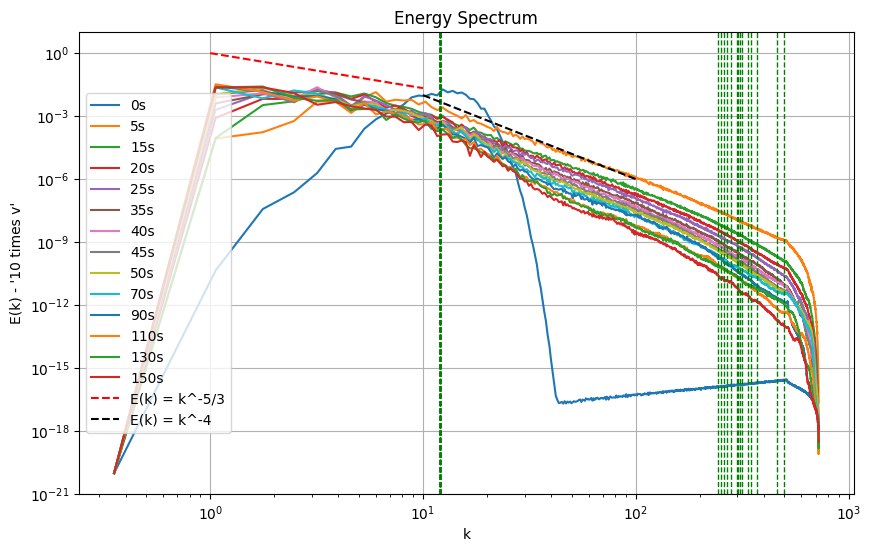

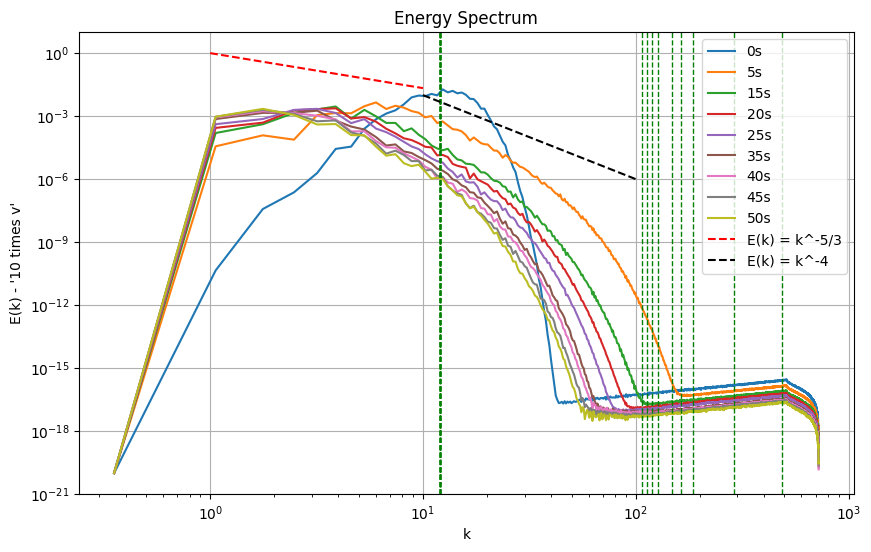

In [83]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    velocity_plotting(file)

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Two dimension freely decay ##

In [84]:
def kdiss(time, nu):
    L_diss = np.sqrt(nu*time)
    k_diss = 1/L_diss
    
    return k_diss

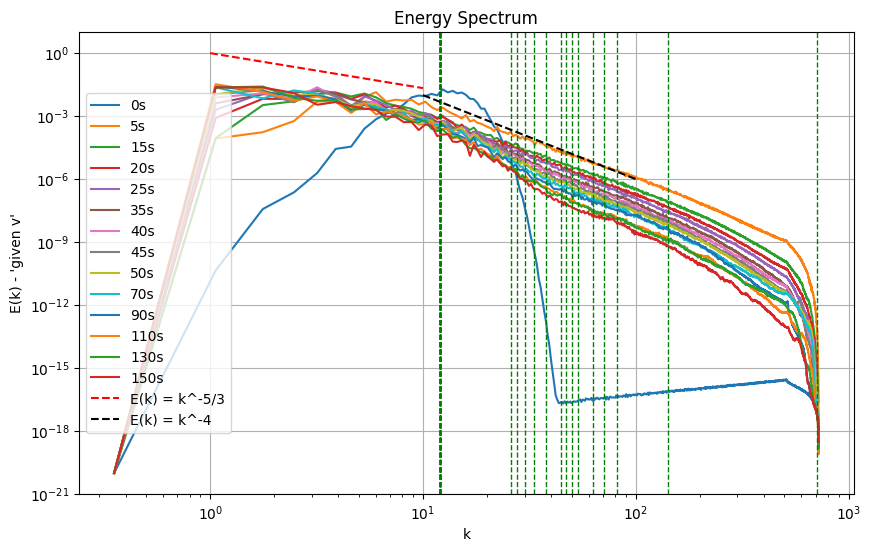

In [85]:
plt.figure(figsize=(10, 6))
kdiss1 = np.array([])
for file in files_vor:
    data, label = get_vorticity(file)
    kdiss1_1 = kdiss(float(label), 0.00001)
    kdiss1 = np.append(kdiss1, kdiss1_1) 
    
for file in files:
    velocity_plotting(file)

for x in kdiss1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - 'given v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

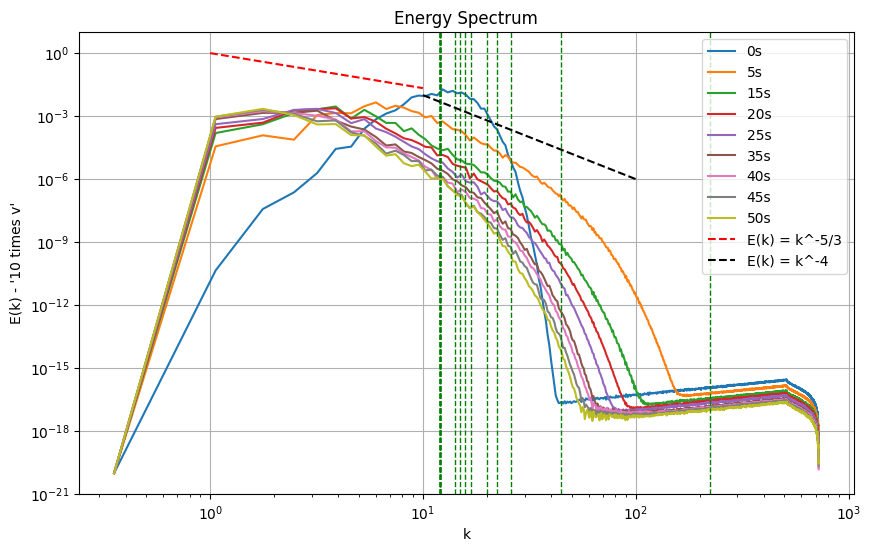

In [86]:
plt.figure(figsize=(10, 6))
kdiss2 = np.array([])
for file in files2_vor:
    data, label = get_vorticity(file)
    kdiss2_2 = kdiss(float(label), 0.0001)
    kdiss2 = np.append(kdiss2, kdiss2_2) 
    
for file in files2:
    velocity_plotting(file)

for x in kdiss2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Fitting ##

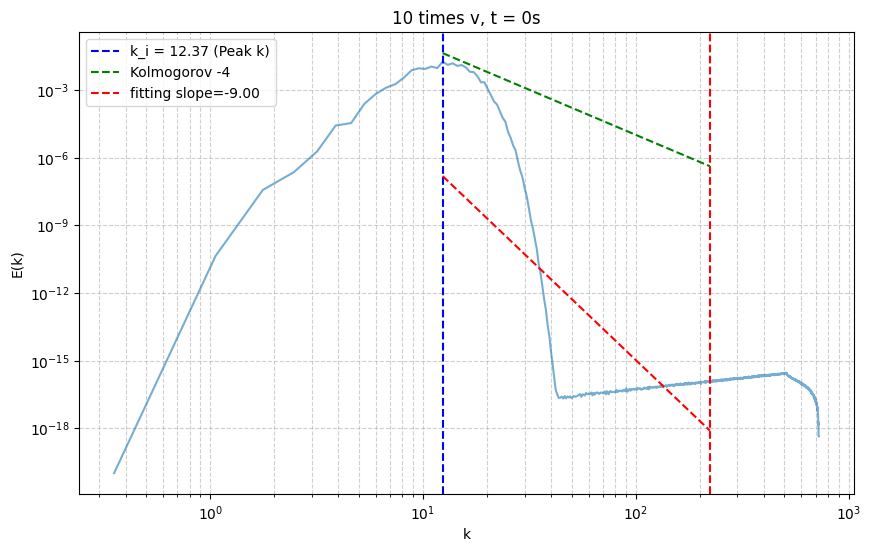

k_i (Peak k): 12.375
fitting slope: -9.000
deviation: 125.00%
R²: 0.551


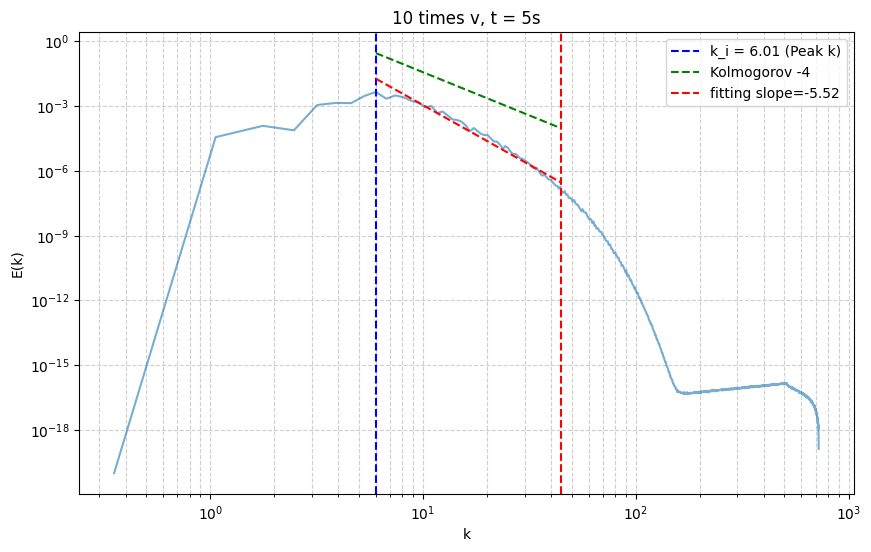

k_i (Peak k): 6.011
fitting slope: -5.523
deviation: 38.08%
R²: 0.975


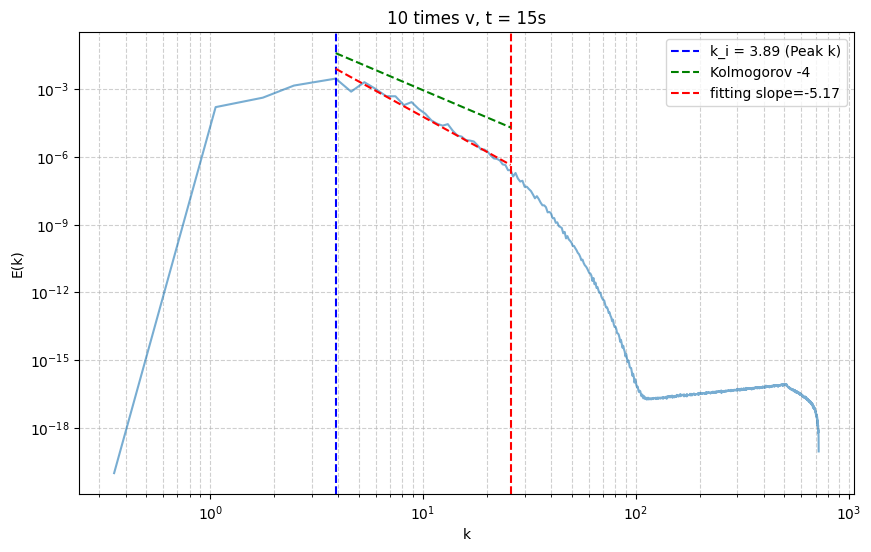

k_i (Peak k): 3.889
fitting slope: -5.175
deviation: 29.37%
R²: 0.973


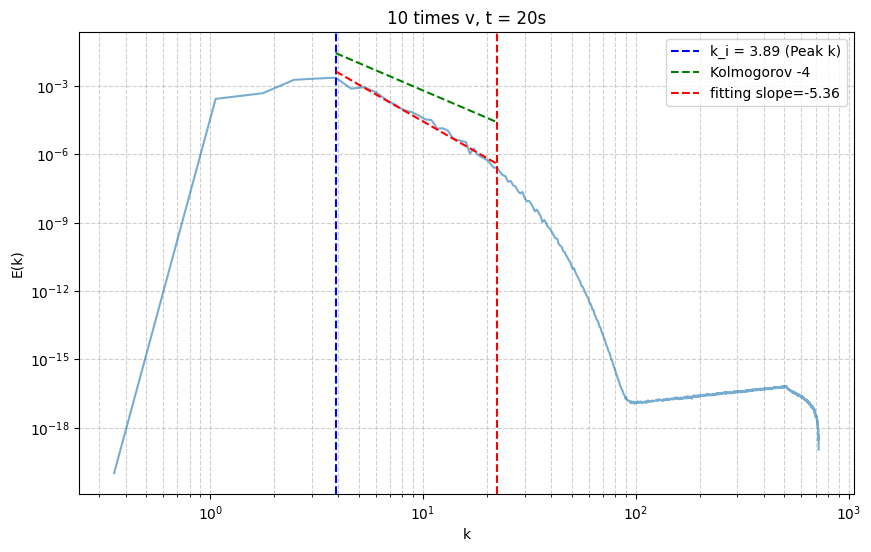

k_i (Peak k): 3.889
fitting slope: -5.359
deviation: 33.97%
R²: 0.981


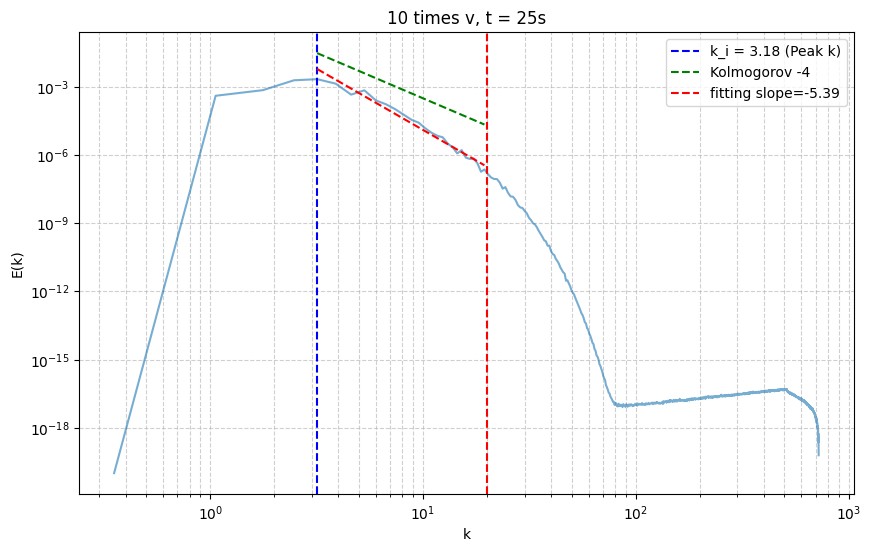

k_i (Peak k): 3.182
fitting slope: -5.392
deviation: 34.79%
R²: 0.975


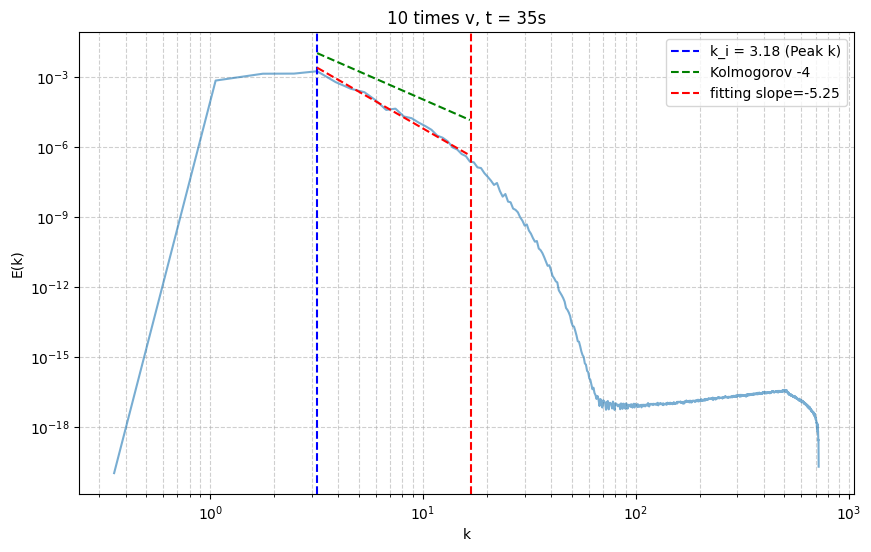

k_i (Peak k): 3.182
fitting slope: -5.247
deviation: 31.18%
R²: 0.986


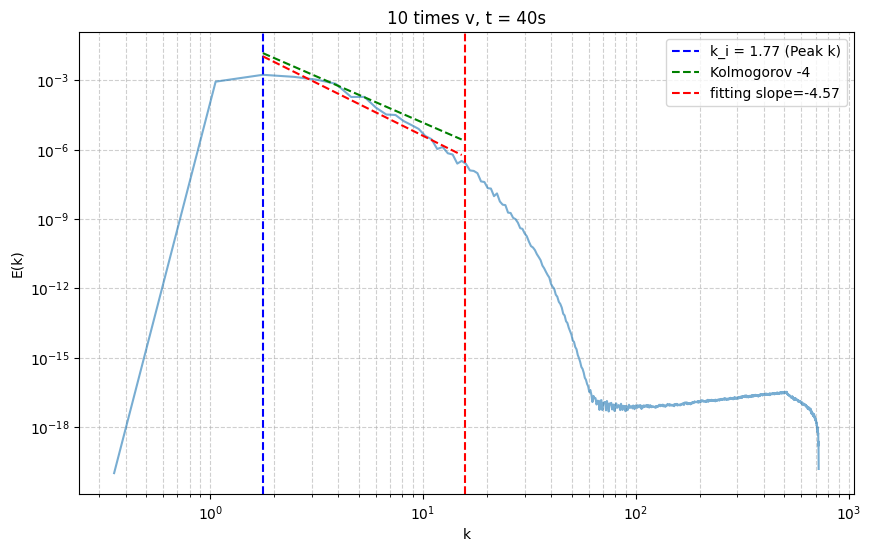

k_i (Peak k): 1.768
fitting slope: -4.566
deviation: 14.15%
R²: 0.941


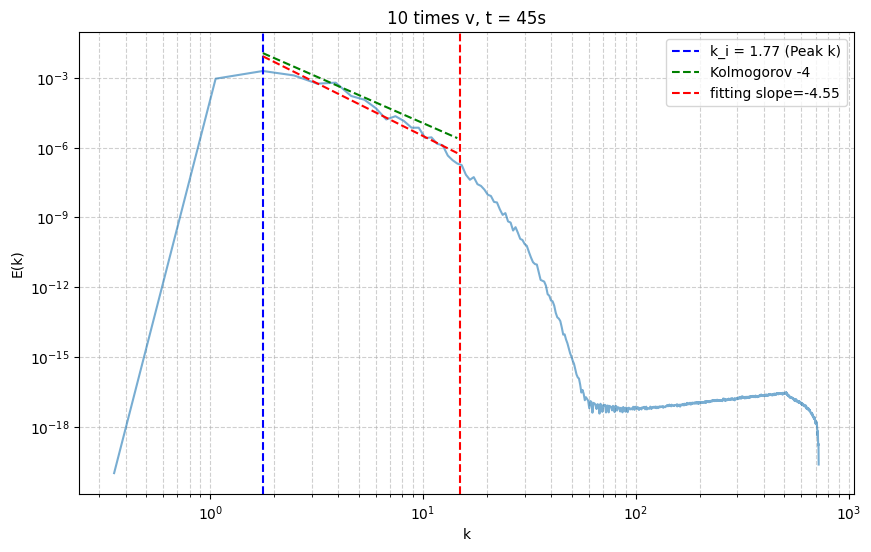

k_i (Peak k): 1.768
fitting slope: -4.555
deviation: 13.86%
R²: 0.947


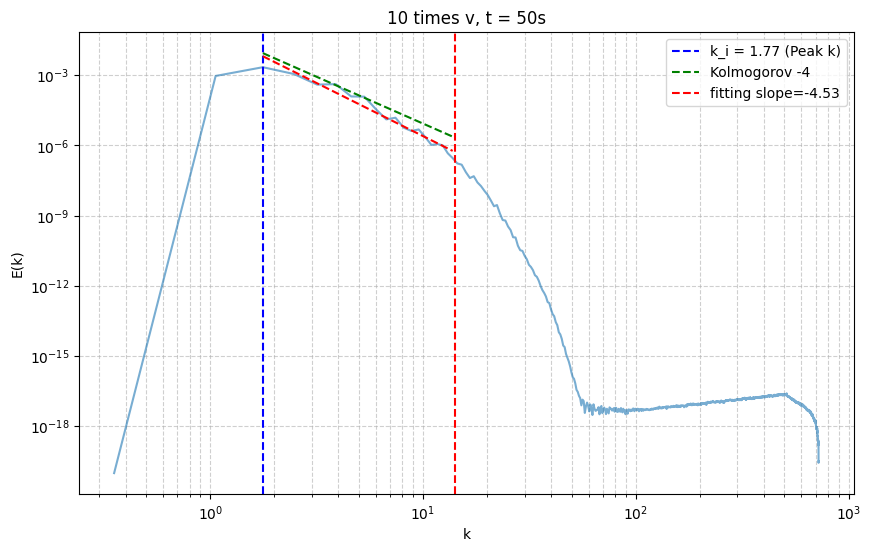

k_i (Peak k): 1.768
fitting slope: -4.535
deviation: 13.37%
R²: 0.965


In [87]:
##### fitting 10 times v #####

for file, k_diss in zip(files2, kdiss2):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21
    #inertial range
    k_i_index = np.argmax(e_k)
    k_i = k[k_i_index]
    k_min, k_max = k_i, k_diss
    mask = (k >= k_min) & (k <= k_max)
    k_vals = k[mask]
    E_vals = e_k[mask]

    log_k = np.log10(k_vals)
    log_E = np.log10(E_vals)

    slope, intercept, r_value, _, _ = stats.linregress(log_k, log_E)

    kolmogorov_slope = -4
    label = file.split('/')[-1].split('_')[0]
    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6)
    plt.axvline(k_i, color='b', linestyle='--', label=f'k_i = {k_i:.2f} (Peak k)')
    plt.axvline(k_diss, color='r', linestyle='--')
    plt.loglog(k_vals, 10**(kolmogorov_slope * log_k + intercept), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals, 10**(slope * log_k + intercept), '--r', label=f"fitting slope={slope:.2f}")
    plt.title(f'10 times v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print(f"k_i (Peak k): {k_i:.3f}")
    print(f"fitting slope: {slope:.3f}")
    print(f"deviation: {abs(slope - kolmogorov_slope)/abs(kolmogorov_slope) * 100:.2f}%")
    print(f"R²: {r_value**2:.3f}")

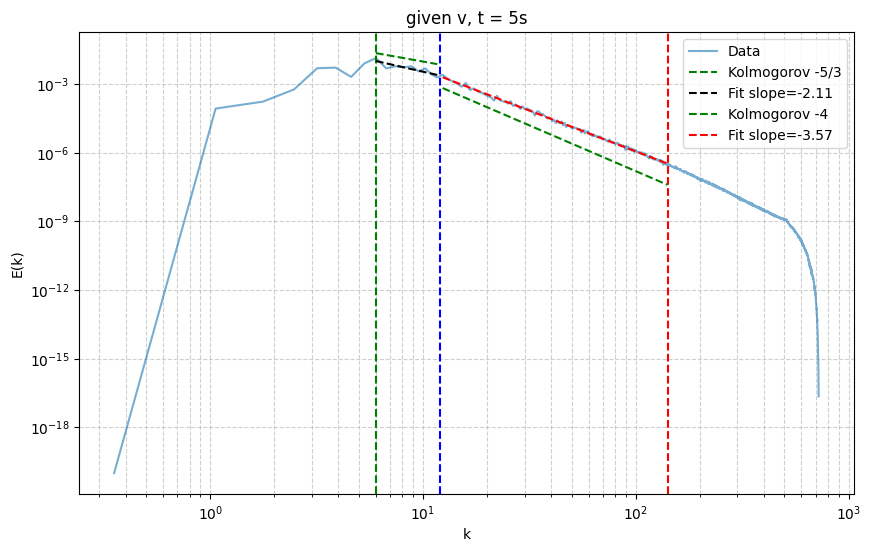

------------------------
Energy(ENG) inertial range Slope: -2.110
Deviation from -5/3: 26.60%
R² for Inverse Cascade: 0.736
------------------------
Enstophy(EST) inertial range Slope: -3.569
Deviation from -4: 10.78%
R² for EST: 0.997


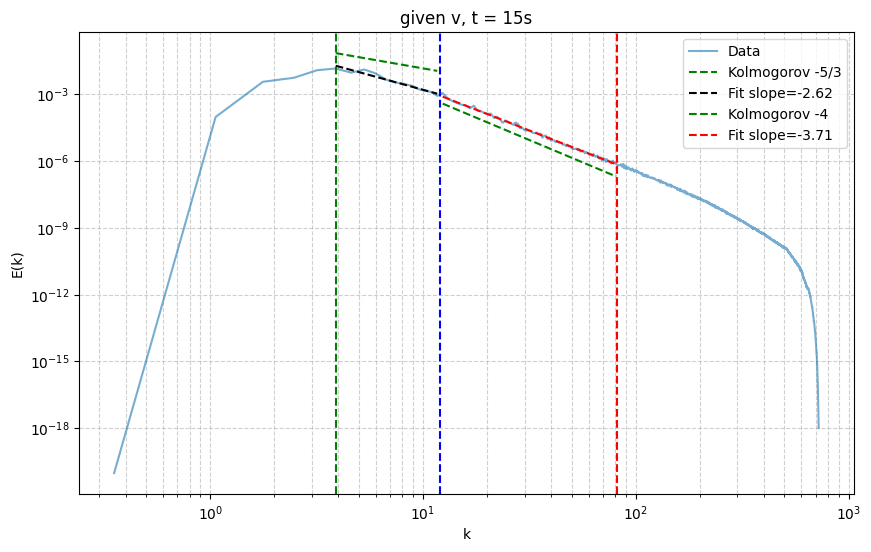

------------------------
Energy(ENG) inertial range Slope: -2.624
Deviation from -5/3: 57.44%
R² for Inverse Cascade: 0.948
------------------------
Enstophy(EST) inertial range Slope: -3.715
Deviation from -4: 7.13%
R² for EST: 0.996


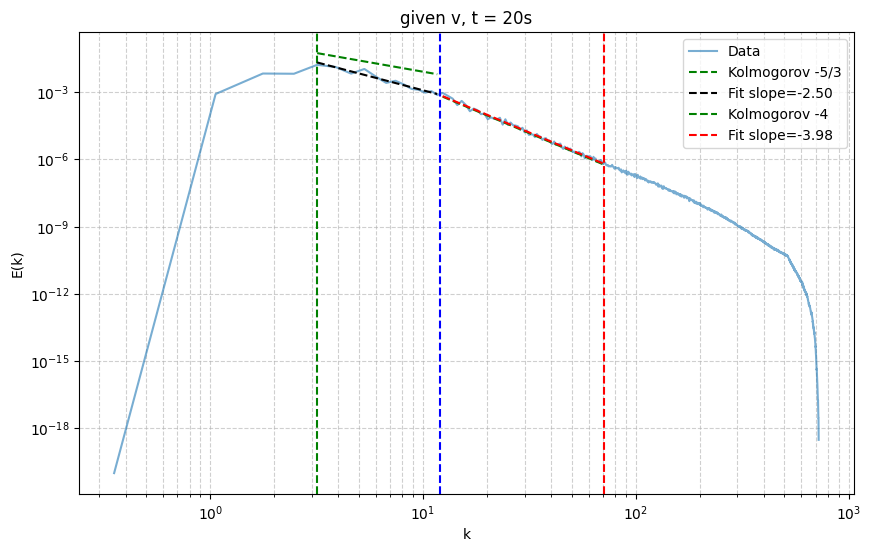

------------------------
Energy(ENG) inertial range Slope: -2.495
Deviation from -5/3: 49.70%
R² for Inverse Cascade: 0.947
------------------------
Enstophy(EST) inertial range Slope: -3.979
Deviation from -4: 0.53%
R² for EST: 0.992


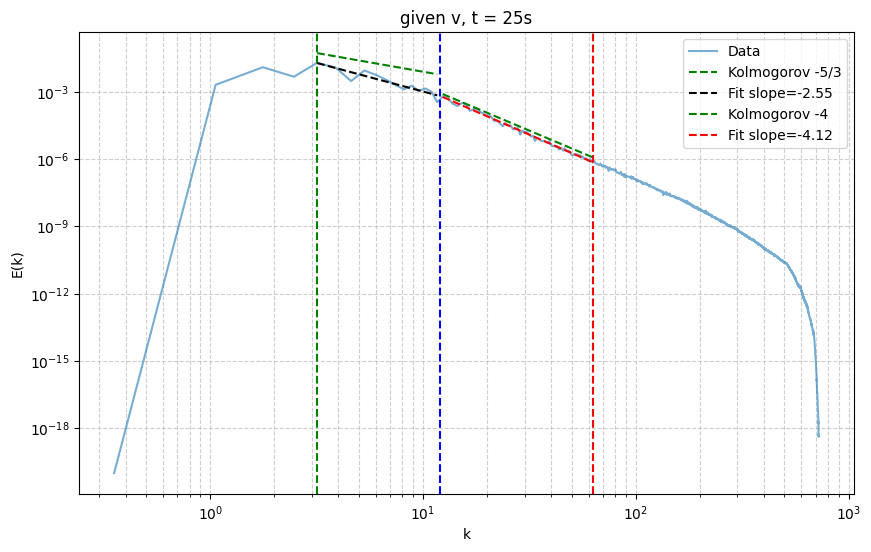

------------------------
Energy(ENG) inertial range Slope: -2.547
Deviation from -5/3: 52.83%
R² for Inverse Cascade: 0.859
------------------------
Enstophy(EST) inertial range Slope: -4.120
Deviation from -4: 3.01%
R² for EST: 0.994


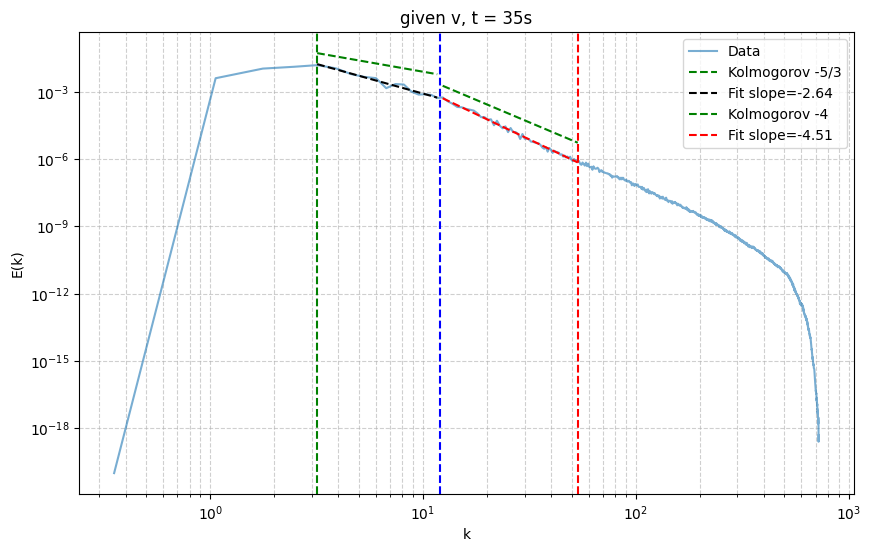

------------------------
Energy(ENG) inertial range Slope: -2.643
Deviation from -5/3: 58.58%
R² for Inverse Cascade: 0.959
------------------------
Enstophy(EST) inertial range Slope: -4.509
Deviation from -4: 12.72%
R² for EST: 0.993


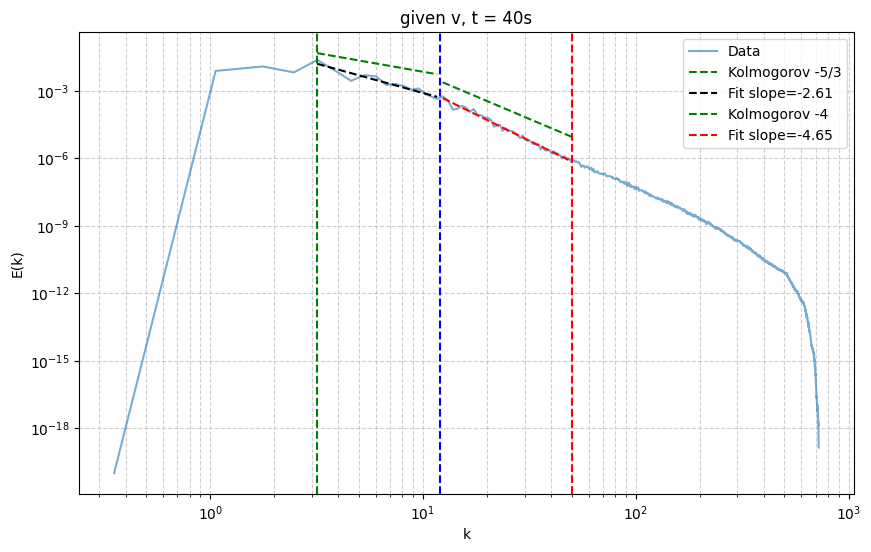

------------------------
Energy(ENG) inertial range Slope: -2.610
Deviation from -5/3: 56.62%
R² for Inverse Cascade: 0.917
------------------------
Enstophy(EST) inertial range Slope: -4.646
Deviation from -4: 16.15%
R² for EST: 0.990


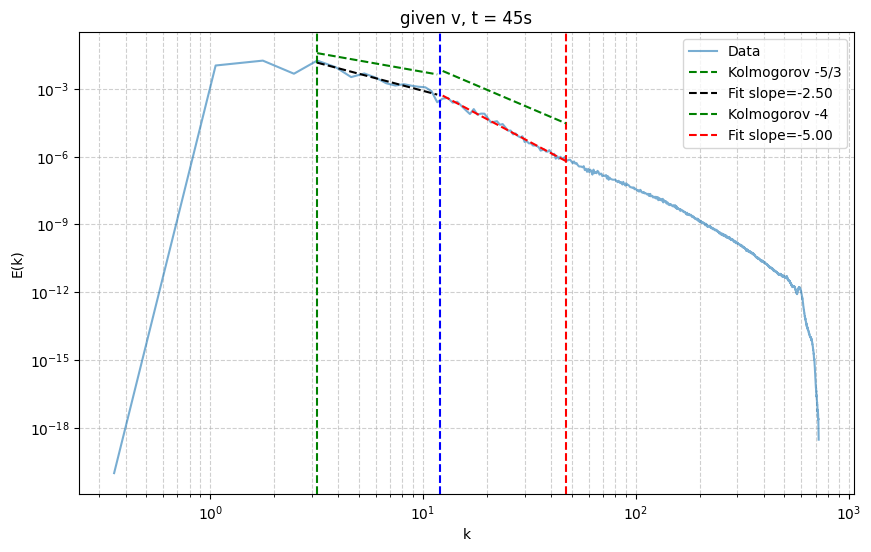

------------------------
Energy(ENG) inertial range Slope: -2.504
Deviation from -5/3: 50.26%
R² for Inverse Cascade: 0.897
------------------------
Enstophy(EST) inertial range Slope: -4.998
Deviation from -4: 24.94%
R² for EST: 0.990


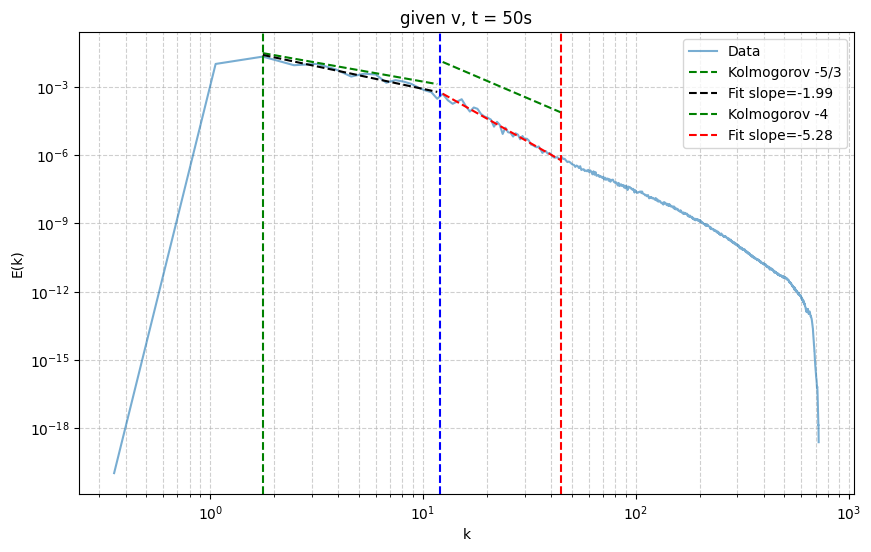

------------------------
Energy(ENG) inertial range Slope: -1.988
Deviation from -5/3: 19.28%
R² for Inverse Cascade: 0.927
------------------------
Enstophy(EST) inertial range Slope: -5.280
Deviation from -4: 31.99%
R² for EST: 0.986


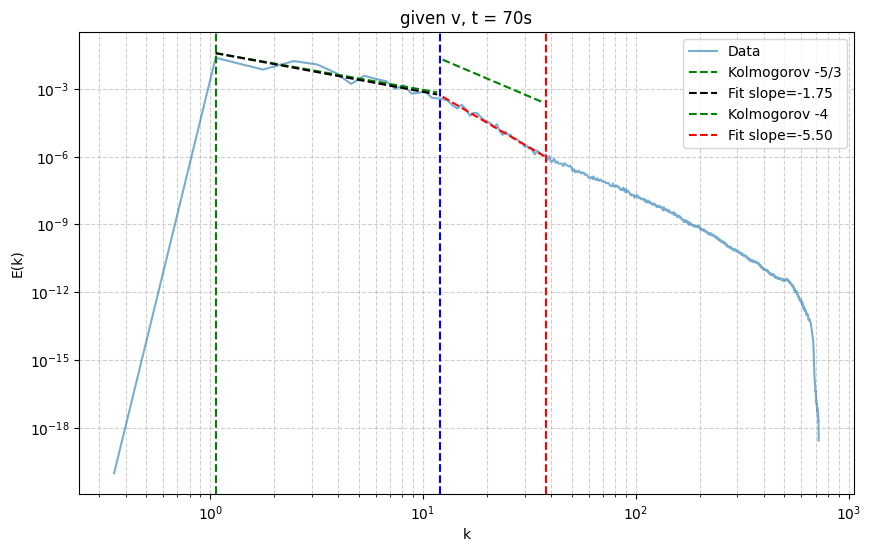

------------------------
Energy(ENG) inertial range Slope: -1.754
Deviation from -5/3: 5.21%
R² for Inverse Cascade: 0.864
------------------------
Enstophy(EST) inertial range Slope: -5.501
Deviation from -4: 37.52%
R² for EST: 0.987


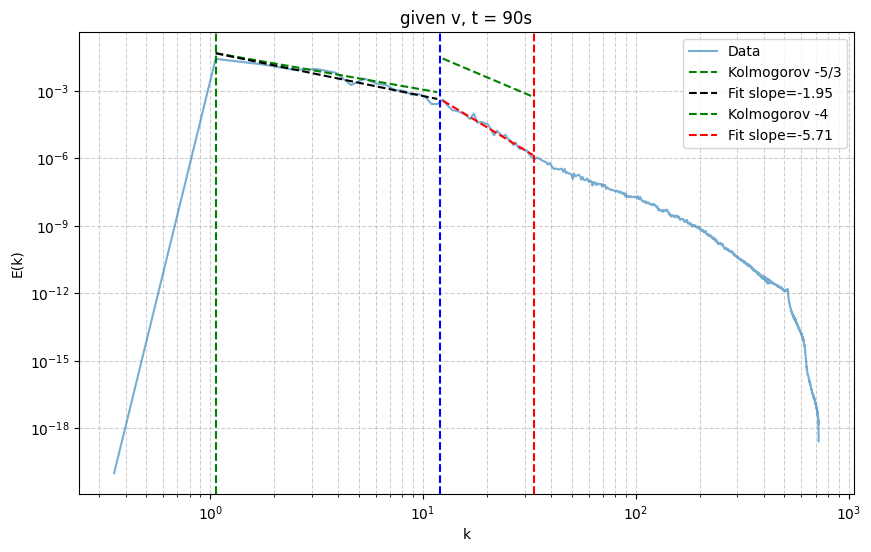

------------------------
Energy(ENG) inertial range Slope: -1.949
Deviation from -5/3: 16.94%
R² for Inverse Cascade: 0.924
------------------------
Enstophy(EST) inertial range Slope: -5.709
Deviation from -4: 42.73%
R² for EST: 0.981


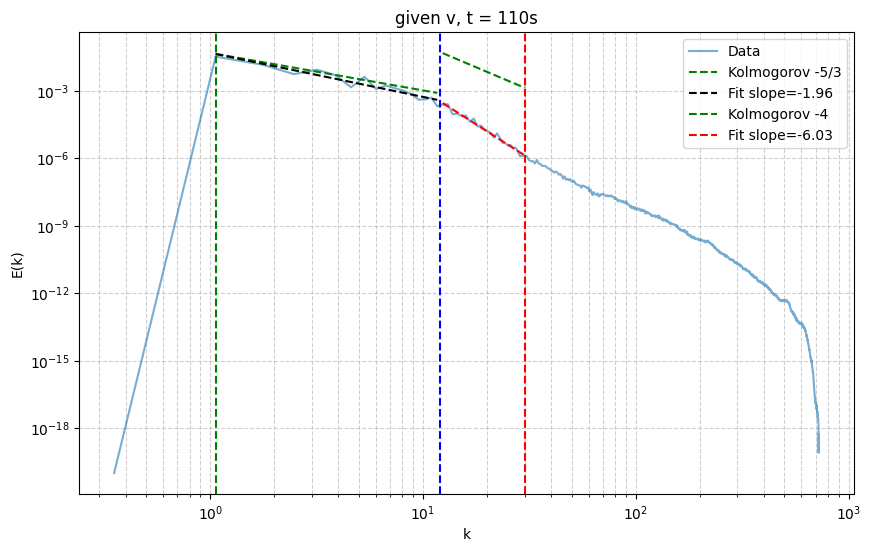

------------------------
Energy(ENG) inertial range Slope: -1.955
Deviation from -5/3: 17.33%
R² for Inverse Cascade: 0.916
------------------------
Enstophy(EST) inertial range Slope: -6.032
Deviation from -4: 50.81%
R² for EST: 0.981


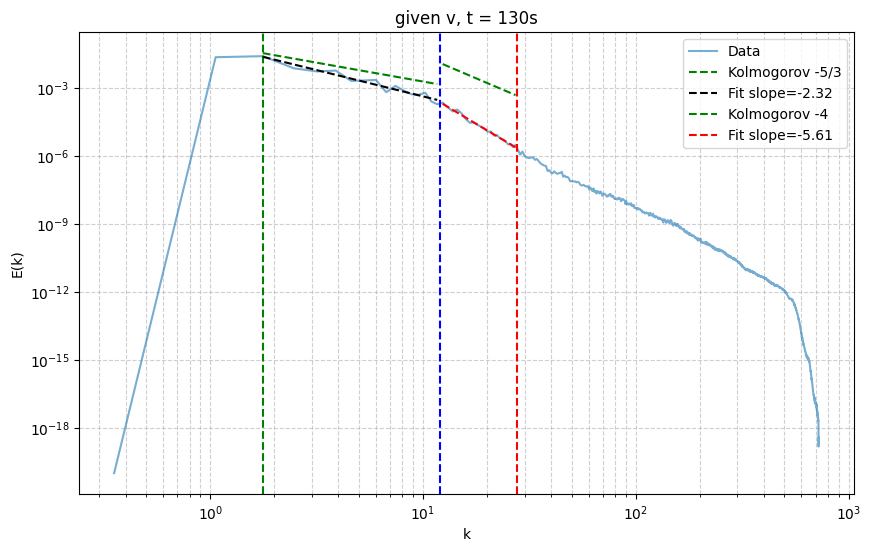

------------------------
Energy(ENG) inertial range Slope: -2.322
Deviation from -5/3: 39.32%
R² for Inverse Cascade: 0.940
------------------------
Enstophy(EST) inertial range Slope: -5.607
Deviation from -4: 40.18%
R² for EST: 0.989


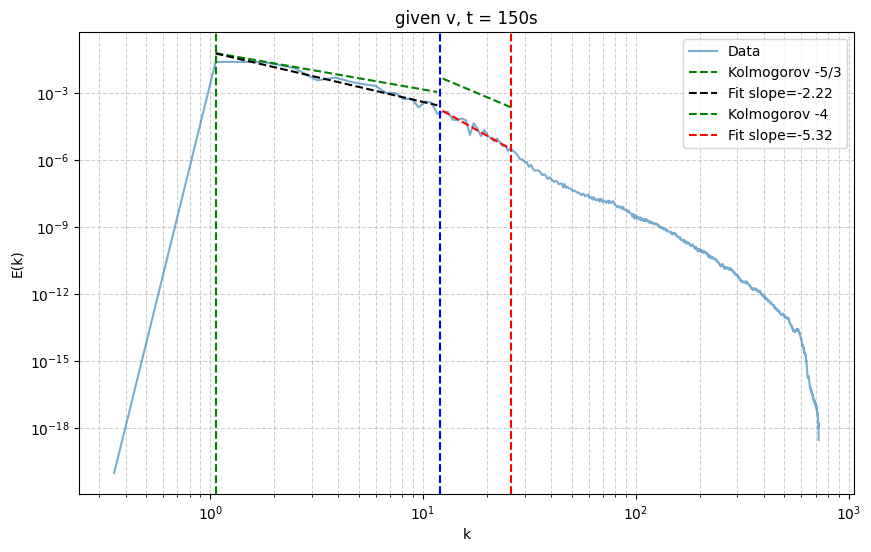

------------------------
Energy(ENG) inertial range Slope: -2.223
Deviation from -5/3: 33.39%
R² for Inverse Cascade: 0.921
------------------------
Enstophy(EST) inertial range Slope: -5.323
Deviation from -4: 33.07%
R² for EST: 0.929


In [88]:
##### fitting given v #####

k_i = 12

for file, k_diss in zip(files, kdiss1):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21 

    k_eps_index = np.argmax(e_k)
    k_eps = k[k_eps_index]
    if k_eps > 12:
        continue
    k_min1, k_max1 = k_eps, k_i
    mask1 = (k >= k_min1) & (k <= k_max1)
    k_vals1 = k[mask1]
    E_vals1 = e_k[mask1]
    
    log_k1 = np.log10(k_vals1)
    log_E1 = np.log10(E_vals1)
    
    slope1, intercept1, r_value1, _, _ = stats.linregress(log_k1, log_E1)

    mask2 = (k >= k_i) & (k <= k_diss)
    k_vals2 = k[mask2]
    E_vals2 = e_k[mask2]

    log_k2 = np.log10(k_vals2)
    log_E2 = np.log10(E_vals2)

    slope2, intercept2, r_value2, _, _ = stats.linregress(log_k2, log_E2)

    kolmogorov_slope1 = -5/3  # Energy inertial range
    kolmogorov_slope2 = -4    # Enstophy inertial range

    label = file.split('/')[-1].split('_')[0]

    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6, label="Data")
    plt.axvline(k_eps, color='g', linestyle='--')
    plt.axvline(k_i, color='b', linestyle='--')
    plt.axvline(k_diss, color='r', linestyle='--')

    plt.loglog(k_vals1, 10**(kolmogorov_slope1 * log_k1 + intercept1), '--g', label=f"Kolmogorov -5/3")
    plt.loglog(k_vals1, 10**(slope1 * log_k1 + intercept1), linestyle='--', color='black', label=f"Fit slope={slope1:.2f}")

    plt.loglog(k_vals2, 10**(kolmogorov_slope2 * log_k2 + intercept2), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals2, 10**(slope2 * log_k2 + intercept2), '--r', label=f"Fit slope={slope2:.2f}")

    plt.title(f'given v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print("------------------------")
    print(f"Energy(ENG) inertial range Slope: {slope1:.3f}")
    print(f"Deviation from -5/3: {abs(slope1 - kolmogorov_slope1)/abs(kolmogorov_slope1) * 100:.2f}%")
    print(f"R² for Inverse Cascade: {r_value1**2:.3f}")
    print("------------------------")
    print(f"Enstophy(EST) inertial range Slope: {slope2:.3f}")
    print(f"Deviation from -4: {abs(slope2 - kolmogorov_slope2)/abs(kolmogorov_slope2) * 100:.2f}%")
    print(f"R² for EST: {r_value2**2:.3f}")


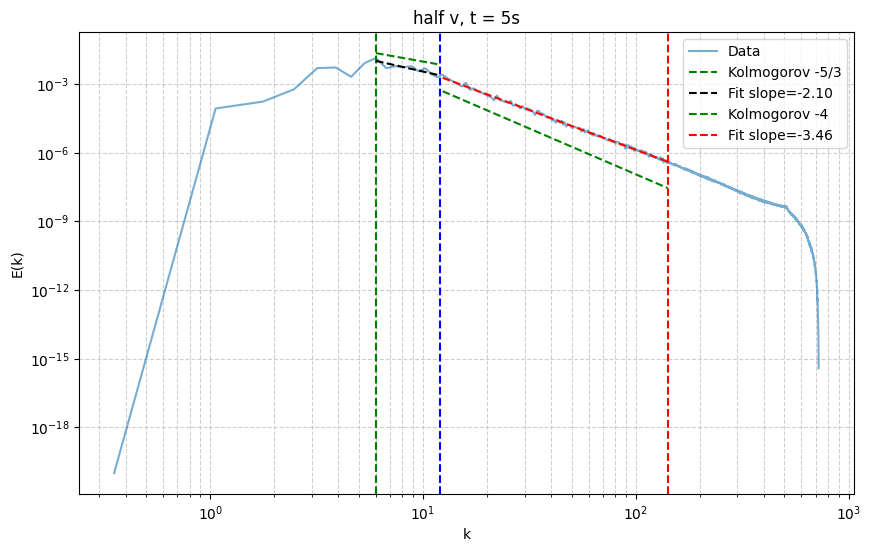

------------------------
Energy(ENG) inertial range Slope: -2.103
Deviation from -5/3: 26.19%
R² for Inverse Cascade: 0.737
------------------------
Enstophy(EST) inertial range Slope: -3.464
Deviation from -4: 13.40%
R² for EST: 0.997


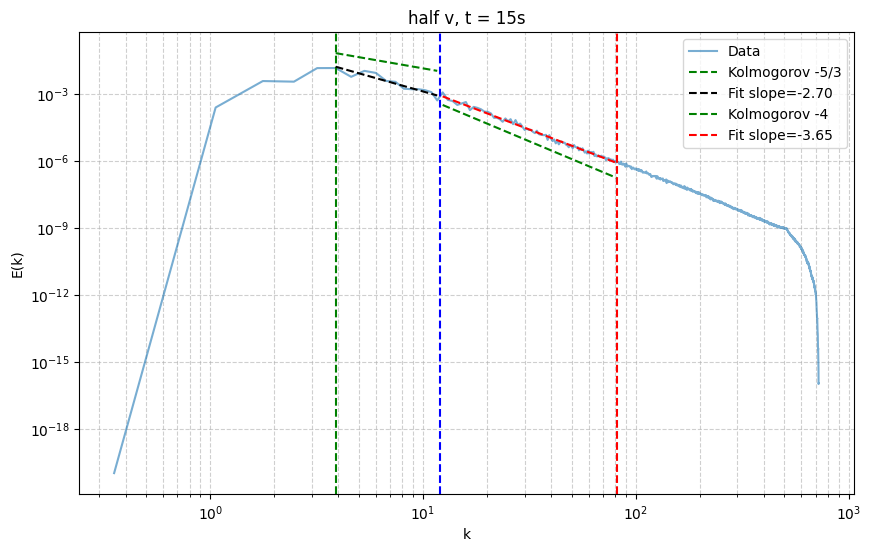

------------------------
Energy(ENG) inertial range Slope: -2.702
Deviation from -5/3: 62.13%
R² for Inverse Cascade: 0.887
------------------------
Enstophy(EST) inertial range Slope: -3.647
Deviation from -4: 8.82%
R² for EST: 0.992


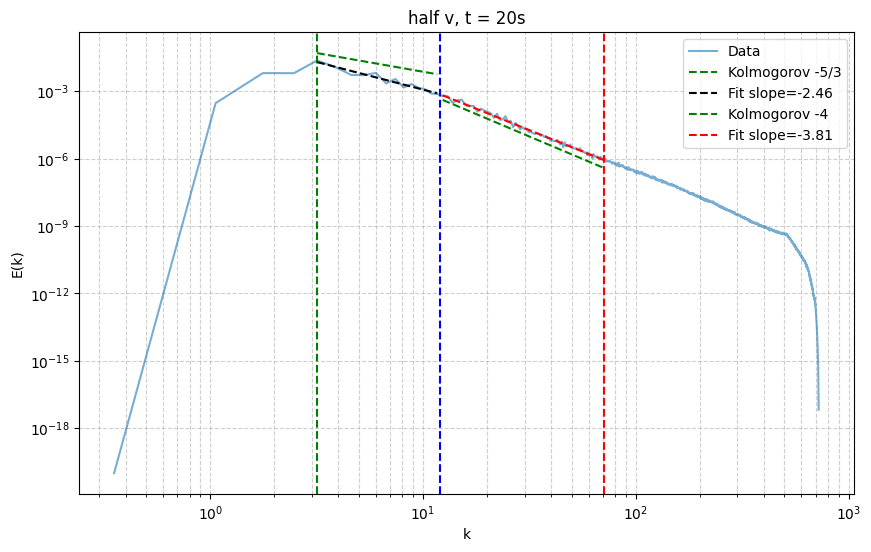

------------------------
Energy(ENG) inertial range Slope: -2.463
Deviation from -5/3: 47.76%
R² for Inverse Cascade: 0.934
------------------------
Enstophy(EST) inertial range Slope: -3.811
Deviation from -4: 4.73%
R² for EST: 0.992


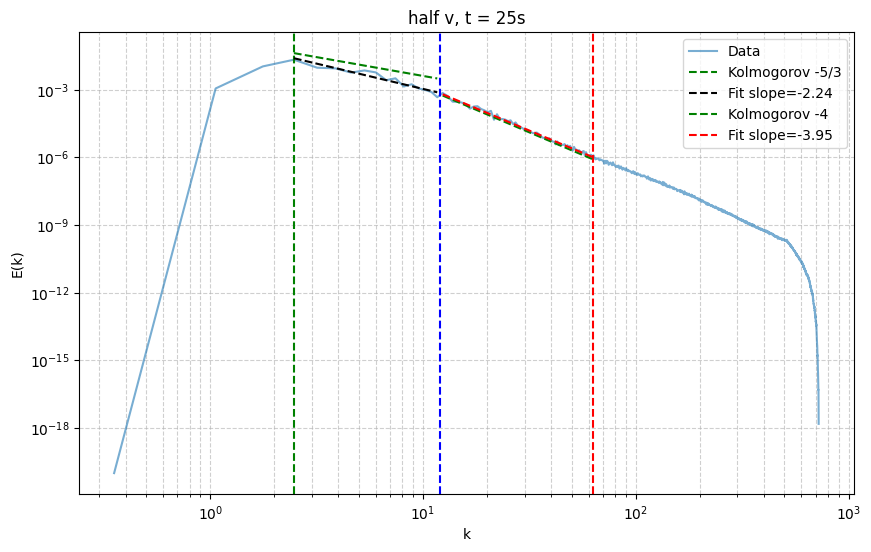

------------------------
Energy(ENG) inertial range Slope: -2.242
Deviation from -5/3: 34.50%
R² for Inverse Cascade: 0.925
------------------------
Enstophy(EST) inertial range Slope: -3.948
Deviation from -4: 1.31%
R² for EST: 0.993


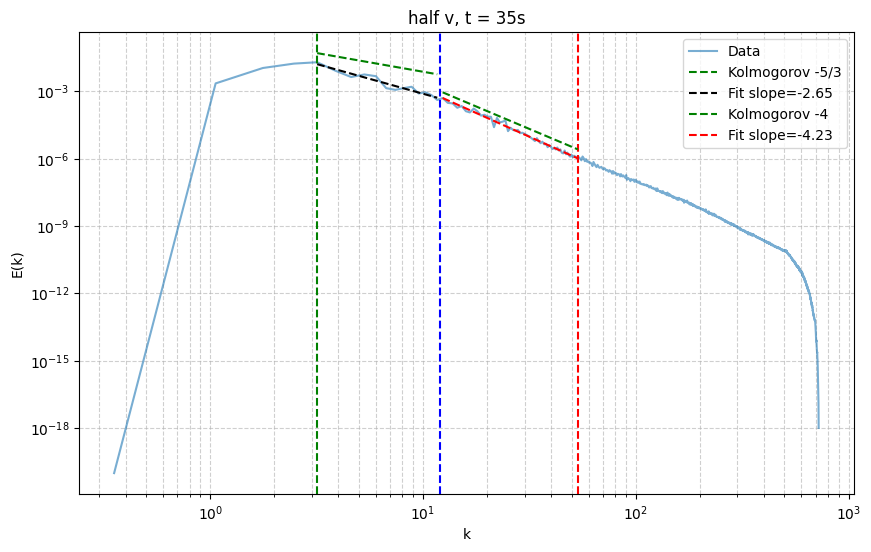

------------------------
Energy(ENG) inertial range Slope: -2.647
Deviation from -5/3: 58.80%
R² for Inverse Cascade: 0.926
------------------------
Enstophy(EST) inertial range Slope: -4.232
Deviation from -4: 5.80%
R² for EST: 0.987


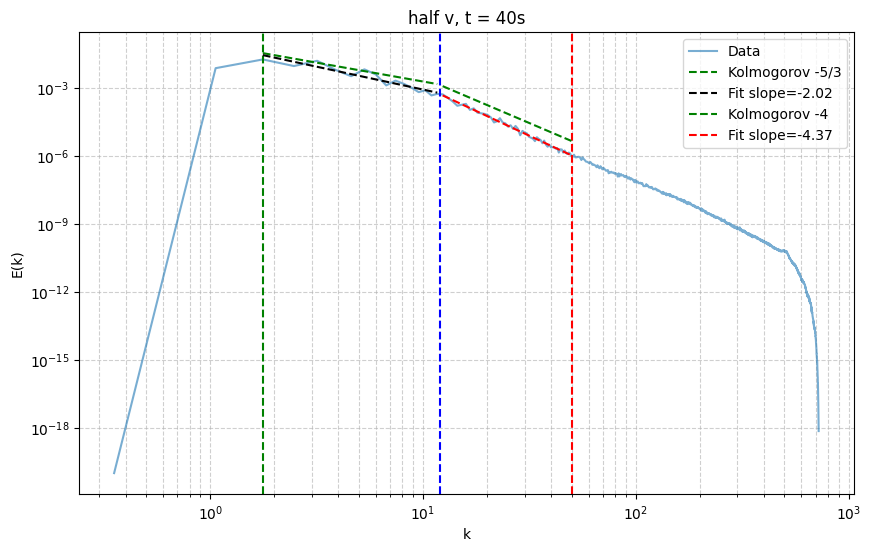

------------------------
Energy(ENG) inertial range Slope: -2.022
Deviation from -5/3: 21.30%
R² for Inverse Cascade: 0.893
------------------------
Enstophy(EST) inertial range Slope: -4.374
Deviation from -4: 9.35%
R² for EST: 0.990


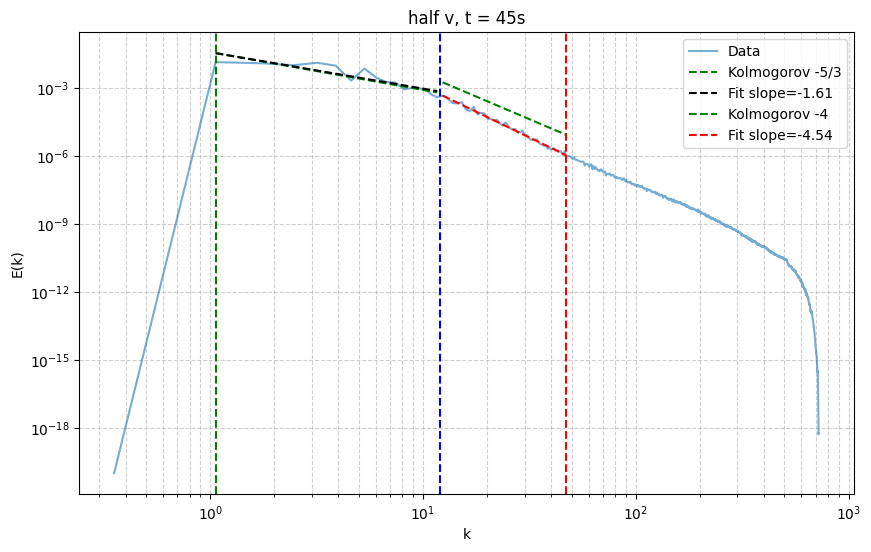

------------------------
Energy(ENG) inertial range Slope: -1.610
Deviation from -5/3: 3.42%
R² for Inverse Cascade: 0.815
------------------------
Enstophy(EST) inertial range Slope: -4.537
Deviation from -4: 13.43%
R² for EST: 0.991


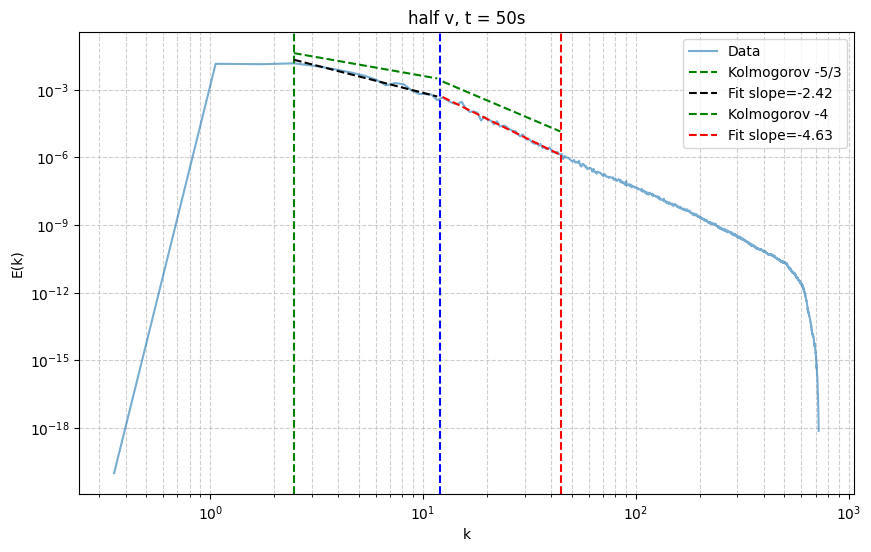

------------------------
Energy(ENG) inertial range Slope: -2.415
Deviation from -5/3: 44.93%
R² for Inverse Cascade: 0.962
------------------------
Enstophy(EST) inertial range Slope: -4.630
Deviation from -4: 15.75%
R² for EST: 0.992


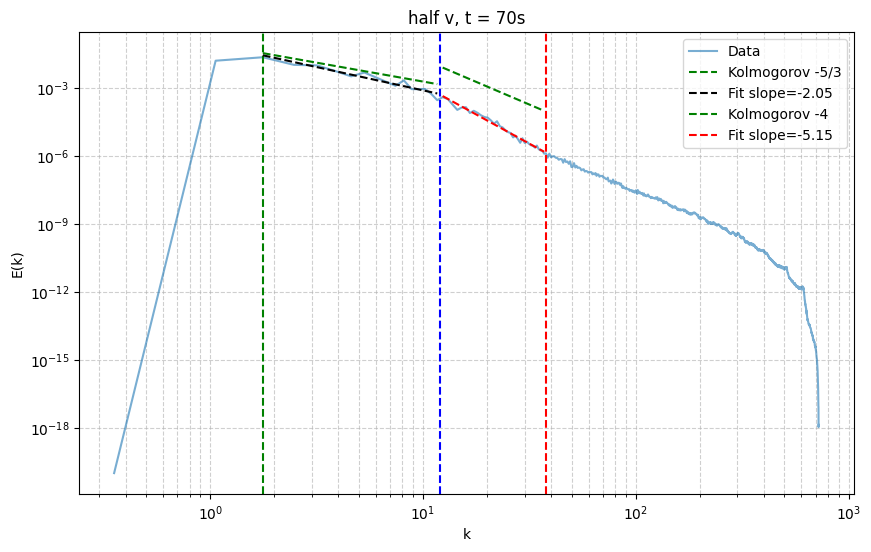

------------------------
Energy(ENG) inertial range Slope: -2.054
Deviation from -5/3: 23.24%
R² for Inverse Cascade: 0.931
------------------------
Enstophy(EST) inertial range Slope: -5.150
Deviation from -4: 28.75%
R² for EST: 0.984


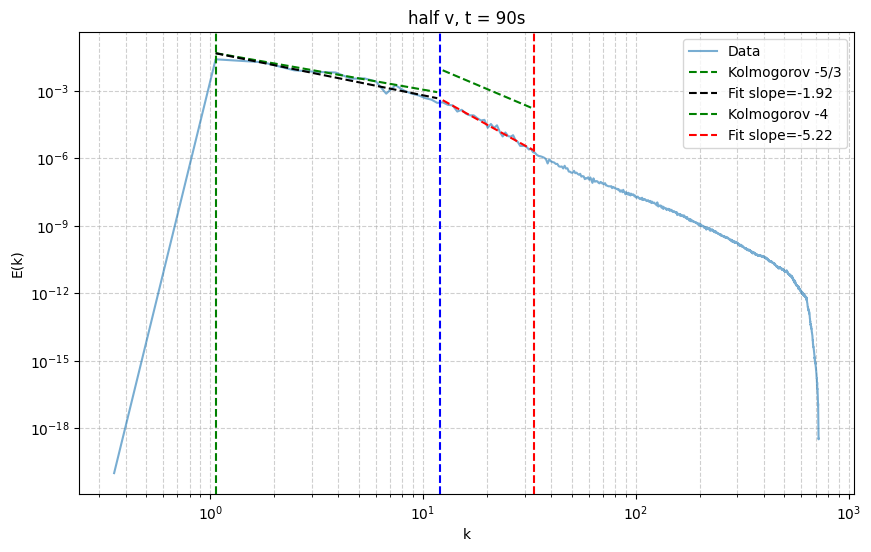

------------------------
Energy(ENG) inertial range Slope: -1.918
Deviation from -5/3: 15.08%
R² for Inverse Cascade: 0.926
------------------------
Enstophy(EST) inertial range Slope: -5.218
Deviation from -4: 30.45%
R² for EST: 0.980


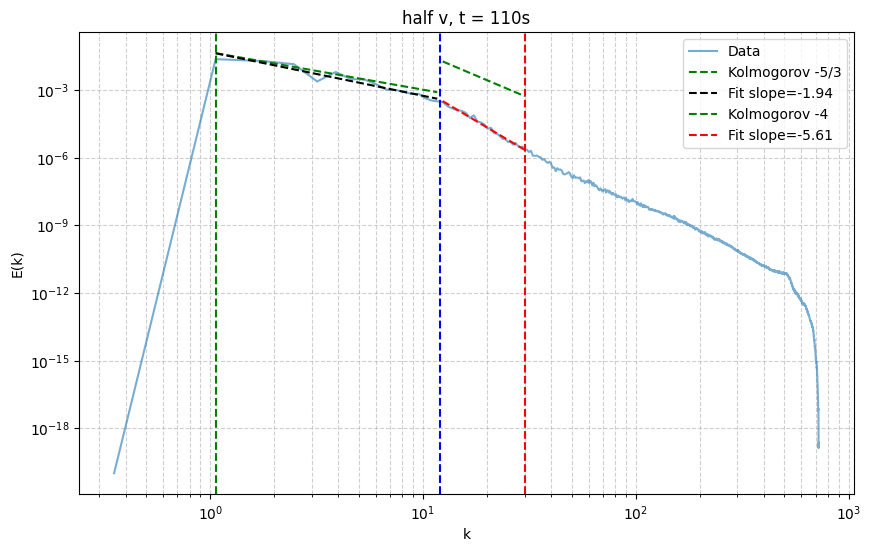

------------------------
Energy(ENG) inertial range Slope: -1.938
Deviation from -5/3: 16.29%
R² for Inverse Cascade: 0.928
------------------------
Enstophy(EST) inertial range Slope: -5.614
Deviation from -4: 40.35%
R² for EST: 0.988


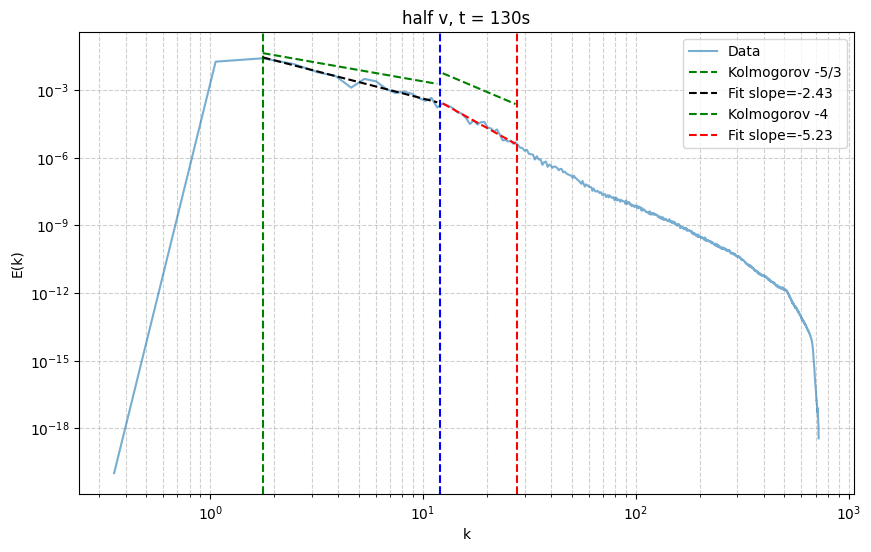

------------------------
Energy(ENG) inertial range Slope: -2.431
Deviation from -5/3: 45.86%
R² for Inverse Cascade: 0.943
------------------------
Enstophy(EST) inertial range Slope: -5.229
Deviation from -4: 30.73%
R² for EST: 0.966


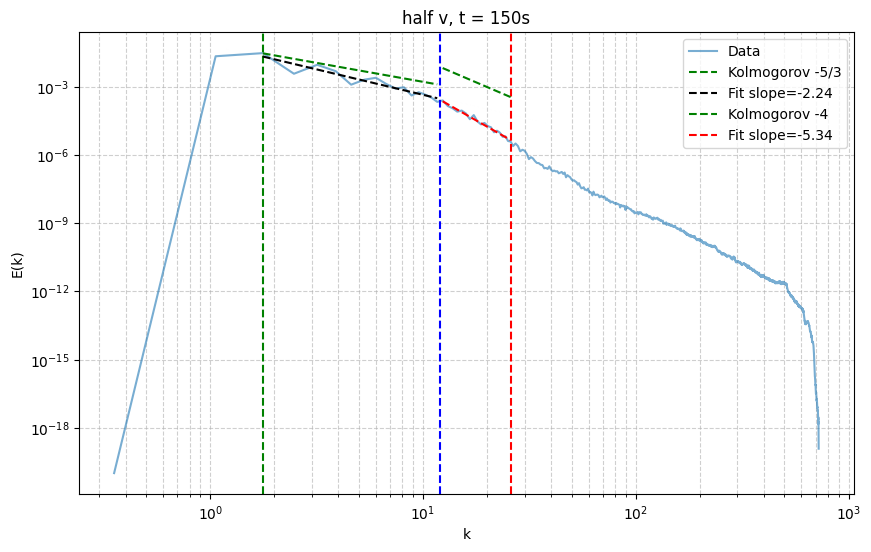

------------------------
Energy(ENG) inertial range Slope: -2.238
Deviation from -5/3: 34.27%
R² for Inverse Cascade: 0.894
------------------------
Enstophy(EST) inertial range Slope: -5.340
Deviation from -4: 33.49%
R² for EST: 0.978


In [89]:
##### fitting half v #####

k_i = 12

for file, k_diss in zip(files3, kdiss1):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21 

    k_eps_index = np.argmax(e_k)
    k_eps = k[k_eps_index]
    if k_eps > 12:
        continue
    k_min1, k_max1 = k_eps, k_i
    mask1 = (k >= k_min1) & (k <= k_max1)
    k_vals1 = k[mask1]
    E_vals1 = e_k[mask1]
    
    log_k1 = np.log10(k_vals1)
    log_E1 = np.log10(E_vals1)
    
    slope1, intercept1, r_value1, _, _ = stats.linregress(log_k1, log_E1)

    mask2 = (k >= k_i) & (k <= k_diss)
    k_vals2 = k[mask2]
    E_vals2 = e_k[mask2]

    log_k2 = np.log10(k_vals2)
    log_E2 = np.log10(E_vals2)

    slope2, intercept2, r_value2, _, _ = stats.linregress(log_k2, log_E2)

    kolmogorov_slope1 = -5/3  # Energy inertial range
    kolmogorov_slope2 = -4    # Enstophy inertial range

    label = file.split('/')[-1].split('_')[0]

    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6, label="Data")
    plt.axvline(k_eps, color='g', linestyle='--')
    plt.axvline(k_i, color='b', linestyle='--')
    plt.axvline(k_diss, color='r', linestyle='--')

    plt.loglog(k_vals1, 10**(kolmogorov_slope1 * log_k1 + intercept1), '--g', label=f"Kolmogorov -5/3")
    plt.loglog(k_vals1, 10**(slope1 * log_k1 + intercept1), linestyle='--', color='black', label=f"Fit slope={slope1:.2f}")

    plt.loglog(k_vals2, 10**(kolmogorov_slope2 * log_k2 + intercept2), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals2, 10**(slope2 * log_k2 + intercept2), '--r', label=f"Fit slope={slope2:.2f}")

    plt.title(f'half v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print("------------------------")
    print(f"Energy(ENG) inertial range Slope: {slope1:.3f}")
    print(f"Deviation from -5/3: {abs(slope1 - kolmogorov_slope1)/abs(kolmogorov_slope1) * 100:.2f}%")
    print(f"R² for Inverse Cascade: {r_value1**2:.3f}")
    print("------------------------")
    print(f"Enstophy(EST) inertial range Slope: {slope2:.3f}")
    print(f"Deviation from -4: {abs(slope2 - kolmogorov_slope2)/abs(kolmogorov_slope2) * 100:.2f}%")
    print(f"R² for EST: {r_value2**2:.3f}")
